# Deep Learning Project: CIFAR-10 Image Classifier
**Category:** Deep Learning / Data Science  
**Student:** Forkan Amin   
**Date:** February 24, 2026

## Introduction
### Dataset Description
The **CIFAR-10** (Canadian Institute For Advanced Research) dataset is a standard benchmark in the field of Computer Vision and Deep Learning. It consists of **60,000 color images** across 10 classes:
* **Vehicles:** Airplane, Automobile, Ship, Truck.
* **Animals:** Bird, Cat, Deer, Dog, Frog, Horse.

### Key Statistics:
* **Image Size:** $32 \times 32$ pixels.
* **Channels:** 3 (RGB).
* **Training Set:** 50,000 images.
* **Test Set:** 10,000 images.
* **Total Features:** $32 \times 32 \times 3 = 3,072$ input features per image.

### Project Goal
The goal of this project is to build a **Dense (Fully Connected) Deep Learning Model** using TensorFlow/Keras. Unlike Convolutional Neural Networks (CNNs), we will explore how a standard Multi-Layer Perceptron (MLP) handles high-dimensional raw pixel data through flattening and deep hidden layers.

Dataset Loading & Preprocessing (Code)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


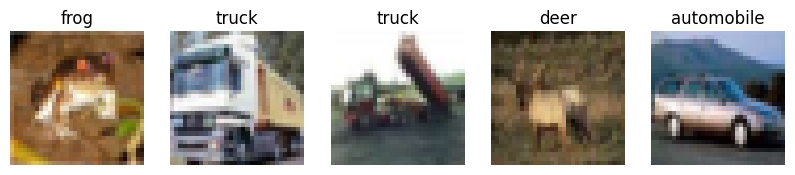

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Sample Visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# 2. Preprocessing
# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

##Methodology
To ensure the model performs optimally, we follow these steps:
1. **Preprocessing:** Normalize pixel values to the range $[0, 1]$ to help the Adam optimizer converge faster.
2. **Architecture:** Use a 4-layer Dense network with **Batch Normalization** for stability and **Dropout** to prevent overfitting.
3. **Training:** Utilize a 20% validation split and categorical cross-entropy loss.

Model Architecture

In [2]:
# 3. Model Architecture
model = models.Sequential([
    # Flatten 32x32x3 image into a 3072 vector
    layers.Flatten(input_shape=(32, 32, 3)),

    # Hidden Layer 1
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(), # Stabilizes learning
    layers.Dropout(0.3),         # Reduces overfitting

    # Hidden Layer 2
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),

    # Hidden Layer 3
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    # Hidden Layer 4
    layers.Dense(64, activation='relu'),

    # Final Output Layer
    layers.Dense(10, activation='softmax')
])

# 4. Training (Compilation)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,066 (6.67 MB)

 Trainable params: 1,747,786 (6.67 MB)

 Non-trainable params: 1,280 (5.00 KB)

Training Process

In [3]:
# Train for 20 epochs with a validation split
history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.2941 - loss: 1.9873 - val_accuracy: 0.3155 - val_loss: 1.9356
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.3923 - loss: 1.6980 - val_accuracy: 0.3695 - val_loss: 1.8137
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4079 - loss: 1.6471 - val_accuracy: 0.3943 - val_loss: 1.7026
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4162 - loss: 1.6250 - val_accuracy: 0.4387 - val_loss: 1.5739
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4263 - loss: 1.6064 - val_accuracy: 0.4367 - val_loss: 1.5819
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4316 - loss: 1.5931 - val_accuracy: 0.4237 - val_loss: 1.6179
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4278 - loss: 1.5976 - val_accuracy: 0.4445 - val_loss: 1.5594
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4403 - loss: 1.5762 - 

Visualization

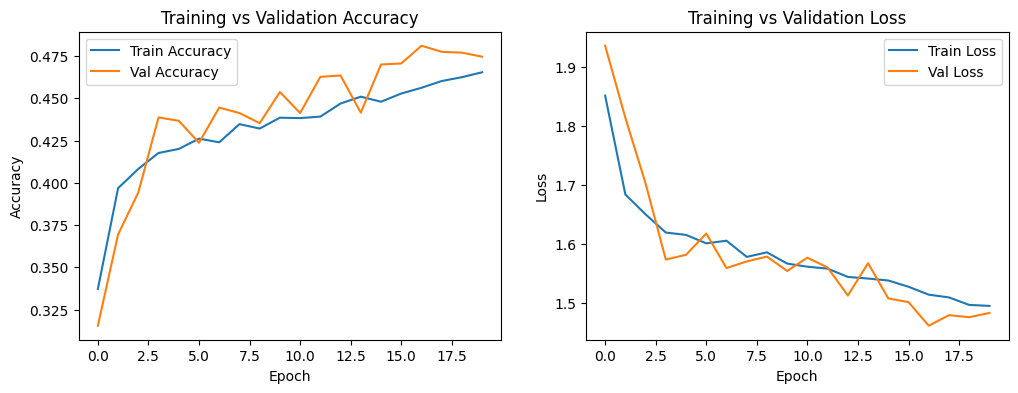

In [4]:
# 5. Visualization of Plots
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Final Evaluation

Final Test Accuracy: 0.4784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


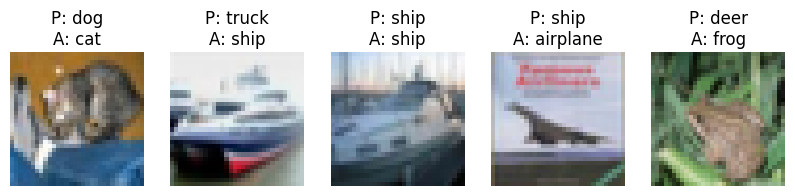

In [5]:
# 6. Evaluation on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

# Show some predictions
predictions = model.predict(x_test[:5])
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"P: {class_names[np.argmax(predictions[i])]}\nA: {class_names[y_test[i][0]]}")
    plt.axis('off')
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


313/313 - 2s - 6ms/step - accuracy: 0.4784 - loss: 1.4668

Final Test Accuracy: 0.4784


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


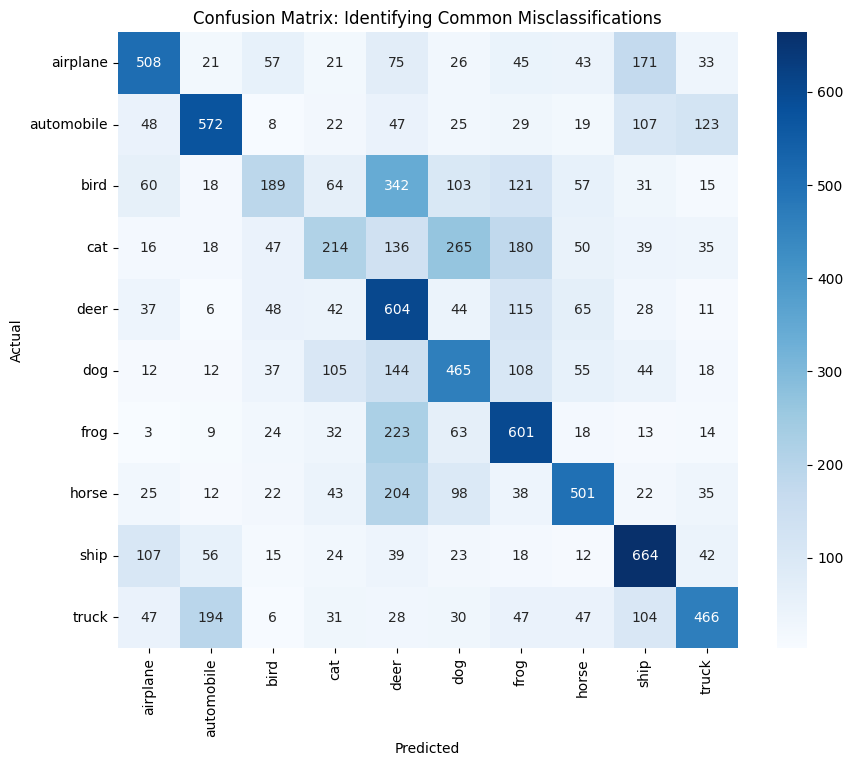

Final Test Accuracy: 0.4784


In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Identifying Common Misclassifications')
plt.show()

# Report final accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

## Final Test Results



- **Test Accuracy:** 47.84%  

- **Test Loss:** 1.4668

Improved CNN Implementation for CIFAR-10

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Data Loading and Preprocessing
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Normalization: Rescale pixel values to the [0, 1] range for stability
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-Hot Encoding: Convert class vectors (integers) to binary class matrices
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Advanced CNN Architecture
# Building a deep Convolutional Neural Network (CNN) to capture spatial features
model = models.Sequential([
    # First Block: Convolutional layers for initial feature extraction
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(), # Stabilizes learning and speeds up convergence
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), # Reduces spatial dimensions (downsampling)
    layers.Dropout(0.2),         # Prevents overfitting by randomly deactivating neurons

    # Second Block: Extracting more complex patterns with more filters
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Third Block: Deep feature extraction
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Final Classification Stage (Dense Layers)
    layers.Flatten(),             # Flattening 3D feature maps into a 1D vector
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

# 3. Model Compilation and Training Configuration
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation: Artificially increases dataset size to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1, # Randomly shift images vertically
    horizontal_flip=True,   # Randomly flip images horizontally
)
datagen.fit(x_train)

# Model Training: Training for 30 epochs to allow for optimal weight updates
# Using the data generator for robust training
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test_cat))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 436s 551ms/step - accuracy: 0.3185 - loss: 2.1308 - val_accuracy: 0.5206 - val_loss: 1.3763
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 420s 537ms/step - accuracy: 0.5264 - loss: 1.3229 - val_accuracy: 0.5421 - val_loss: 1.2871
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 410s 524ms/step - accuracy: 0.6009 - loss: 1.1250 - val_accuracy: 0.6411 - val_loss: 1.0456
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 410s 524ms/step - accuracy: 0.6442 - loss: 1.0082 - val_accuracy: 0.6747 - val_loss: 0.9588
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 409s 523ms/step - accuracy: 0.6701 - loss: 0.9562 - val_accuracy: 0.6918 - val_loss: 0.9097
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 410s 525ms/step - accuracy: 0.6894 - loss: 0.9012 - val_accuracy: 0.6354 - val_loss: 1.1396
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 414s 529ms/step - accuracy: 0.7005 - loss: 0.8601 - val_accuracy: 0.7163 - val_loss: 0.8561
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 409s 522ms/step - accuracy: 0.7100 -


Final Test Accuracy: 82.42%
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


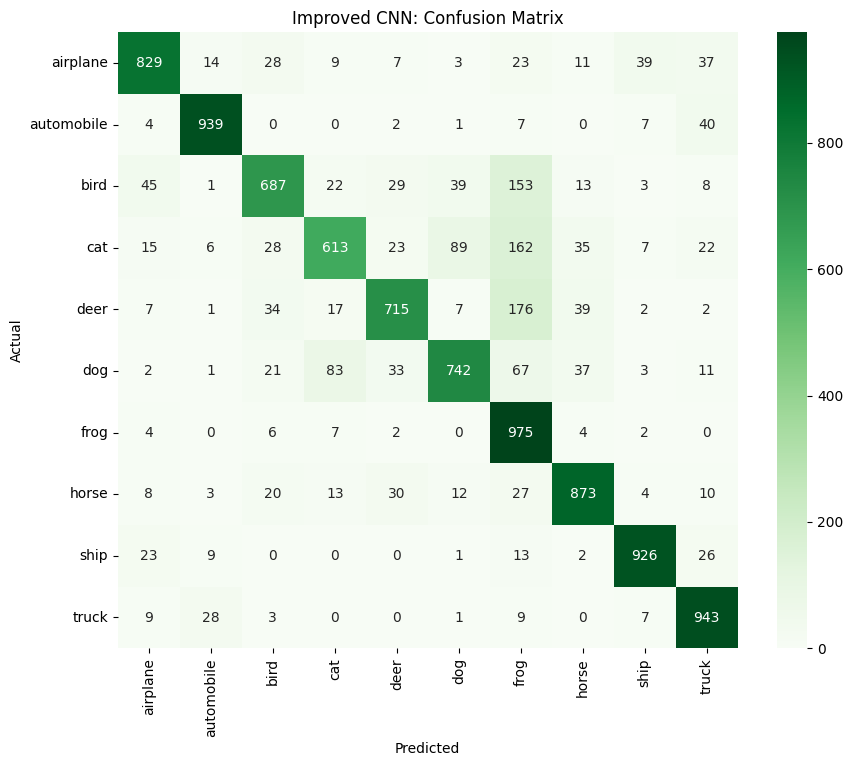

In [11]:
# Accuracy Check
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Improved CNN: Confusion Matrix')
plt.show()